In [1]:
# https://www.pwc.com/ng/en/publications/the-nigerian-tax-reform-acts.html

## Scraping Data

In [2]:
import gensim as gs

In [3]:
from bs4 import BeautifulSoup
import requests
import re

response = requests.get("https://www.pwc.com/ng/en/publications/the-nigerian-tax-reform-acts.html")
source = BeautifulSoup(response.content, "lxml")

tax_reform_texts = re.sub(r"[!@#$%&()<>/{}]\s+", " ", source.text)

## Tokenization

#### Sentence Tokenization

In [4]:
tax_reform_texts.split(".")

["\n\n\n\n\n\n\n\n\n\n\nThe Nigerian Tax Reform Acts\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to content\nSkip to footer\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIndustries\nServices\nAbout us\nCareers\n\nMore\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n Menu\n\n\nIndustries\n\nIndustries\n\n\nAgribusiness\nConsumer and industrial products and services\nEnergy utilities and mining\nFinancial services\nGovernment and public sector\nGovernments\nInternational development agencies (IDAs Mining\nOil and gas\nPower and utilities\nTechnology, information, communication and entertainment\n\n\n\n\n\n\n\n\n Menu\n\n\nIndustries\n\nAgribusiness\n\n\n\n\n\n\n\n Menu\n\n\nIndustries\n\nConsumer and industrial products and services\n\n\n\n\n\n\n\n Menu\n\n\nIndustries\n\nEnergy utilities and mining\n\n\n\n\n\n\n\n Menu\n\n\nIndustries\n\nFinancial services\n\n\n\n\n\n\n\n Menu\n\n\nInd

In [5]:
tax_reform_lines = [re.sub(r"\s+", " ", line).strip() 
                for line in tax_reform_texts.split("\n") if line.strip()]

tax_reform_lines

['The Nigerian Tax Reform Acts',
 'Skip to content',
 'Skip to footer',
 'Industries',
 'Services',
 'About us',
 'Careers',
 'More',
 'Search',
 'Menu',
 'Industries',
 'Industries',
 'Agribusiness',
 'Consumer and industrial products and services',
 'Energy utilities and mining',
 'Financial services',
 'Government and public sector',
 'Governments',
 'International development agencies (IDAs Mining',
 'Oil and gas',
 'Power and utilities',
 'Technology, information, communication and entertainment',
 'Menu',
 'Industries',
 'Agribusiness',
 'Menu',
 'Industries',
 'Consumer and industrial products and services',
 'Menu',
 'Industries',
 'Energy utilities and mining',
 'Menu',
 'Industries',
 'Financial services',
 'Menu',
 'Industries',
 'Government and public sector',
 'Menu',
 'Industries',
 'Governments',
 'Menu',
 'Industries',
 'International development agencies (IDAs Menu',
 'Industries',
 'Mining',
 'Menu',
 'Industries',
 'Oil and gas',
 'Menu',
 'Industries',
 'Power and u

In [6]:
tax_reform_lines = [re.sub(r"\d", " ", line.lower())
                    for line in tax_reform_lines if len(line.strip()) > 6]


tax_reform_lines[50:1000]

['assurance services',
 'services',
 'tax services',
 'services',
 'experience centre',
 'services',
 'services',
 'consulting risks services',
 'about us',
 'about us',
 'africa footprint',
 'advisory academy',
 'business school',
 'corporate responsibility',
 'global third party code of conduct',
 'human rights statement',
 'insights',
 'our offices',
 'our societal purpose',
 'subscription',
 'tax academy',
 'about us',
 'africa footprint',
 'about us',
 'advisory academy',
 'about us',
 'about us',
 'business school',
 'about us',
 'corporate responsibility',
 'about us',
 'global third party code of conduct',
 'about us',
 'human rights statement',
 'about us',
 'insights',
 'insights and publications',
 'press room',
 'about us',
 'our offices',
 'about us',
 'our societal purpose',
 'about us',
 'subscription',
 'about us',
 'tax academy',
 'featured',
 'the new equation',
 'nigeria budget     ',
 'pwc cares covid-   intervention update bulletin',
 'careers',
 'careers',
 'exper

### Word tokenization

In [7]:
import nltk

from nltk import word_tokenize

tax_reform_wtk_lines = [word_tokenize(sentence) for sentence in tax_reform_lines]
tax_reform_wtk_lines[10:50]

[['consumer', 'and', 'industrial', 'products', 'and', 'services'],
 ['energy', 'utilities', 'and', 'mining'],
 ['financial', 'services'],
 ['government', 'and', 'public', 'sector'],
 ['governments'],
 ['international', 'development', 'agencies', '(', 'idas', 'mining'],
 ['oil', 'and', 'gas'],
 ['power', 'and', 'utilities'],
 ['technology',
  ',',
  'information',
  ',',
  'communication',
  'and',
  'entertainment'],
 ['industries'],
 ['agribusiness'],
 ['industries'],
 ['consumer', 'and', 'industrial', 'products', 'and', 'services'],
 ['industries'],
 ['energy', 'utilities', 'and', 'mining'],
 ['industries'],
 ['financial', 'services'],
 ['industries'],
 ['government', 'and', 'public', 'sector'],
 ['industries'],
 ['governments'],
 ['industries'],
 ['international', 'development', 'agencies', '(', 'idas', 'menu'],
 ['industries'],
 ['industries'],
 ['oil', 'and', 'gas'],
 ['industries'],
 ['power', 'and', 'utilities'],
 ['industries'],
 ['technology',
  ',',
  'information',
  ',',
  

### Character Tokenization

In [8]:
tax_reform_char_tk = [list(sentence) for sentence in tax_reform_lines]
print(tax_reform_char_tk[10:50])

[['c', 'o', 'n', 's', 'u', 'm', 'e', 'r', ' ', 'a', 'n', 'd', ' ', 'i', 'n', 'd', 'u', 's', 't', 'r', 'i', 'a', 'l', ' ', 'p', 'r', 'o', 'd', 'u', 'c', 't', 's', ' ', 'a', 'n', 'd', ' ', 's', 'e', 'r', 'v', 'i', 'c', 'e', 's'], ['e', 'n', 'e', 'r', 'g', 'y', ' ', 'u', 't', 'i', 'l', 'i', 't', 'i', 'e', 's', ' ', 'a', 'n', 'd', ' ', 'm', 'i', 'n', 'i', 'n', 'g'], ['f', 'i', 'n', 'a', 'n', 'c', 'i', 'a', 'l', ' ', 's', 'e', 'r', 'v', 'i', 'c', 'e', 's'], ['g', 'o', 'v', 'e', 'r', 'n', 'm', 'e', 'n', 't', ' ', 'a', 'n', 'd', ' ', 'p', 'u', 'b', 'l', 'i', 'c', ' ', 's', 'e', 'c', 't', 'o', 'r'], ['g', 'o', 'v', 'e', 'r', 'n', 'm', 'e', 'n', 't', 's'], ['i', 'n', 't', 'e', 'r', 'n', 'a', 't', 'i', 'o', 'n', 'a', 'l', ' ', 'd', 'e', 'v', 'e', 'l', 'o', 'p', 'm', 'e', 'n', 't', ' ', 'a', 'g', 'e', 'n', 'c', 'i', 'e', 's', ' ', '(', 'i', 'd', 'a', 's', ' ', 'm', 'i', 'n', 'i', 'n', 'g'], ['o', 'i', 'l', ' ', 'a', 'n', 'd', ' ', 'g', 'a', 's'], ['p', 'o', 'w', 'e', 'r', ' ', 'a', 'n', 'd', ' ',

### Subword Tokenization

In [9]:
with open('tax_reform_data.txt', 'w') as f:
    f.write('\n'.join(tax_reform_lines))

In [10]:
import sentencepiece as spm

spm.SentencePieceTrainer.train(input='tax_reform_data.txt', model_prefix='m', vocab_size=500)


In [11]:
sp = spm.SentencePieceProcessor(model_file='m.model')

In [12]:
#Known word

known_word = "reform"
tokens = sp.EncodeAsPieces(known_word)
print(f'{known_word}: {tokens}')

#Unknown word

unknown_word = "conform"
tokens = sp.EncodeAsPieces(unknown_word)
print(f'{unknown_word}: {tokens}')

reform: ['▁reform']
conform: ['▁con', 'for', 'm']


In [13]:
sp.EncodeAsPieces('The Consumer and industrial products and services')

['▁',
 'T',
 'h',
 'e',
 '▁',
 'C',
 'o',
 'n',
 's',
 'um',
 'er',
 '▁and',
 '▁industri',
 'al',
 '▁products',
 '▁and',
 '▁services']

## Visualizing Text Data

<BarContainer object of 42 artists>

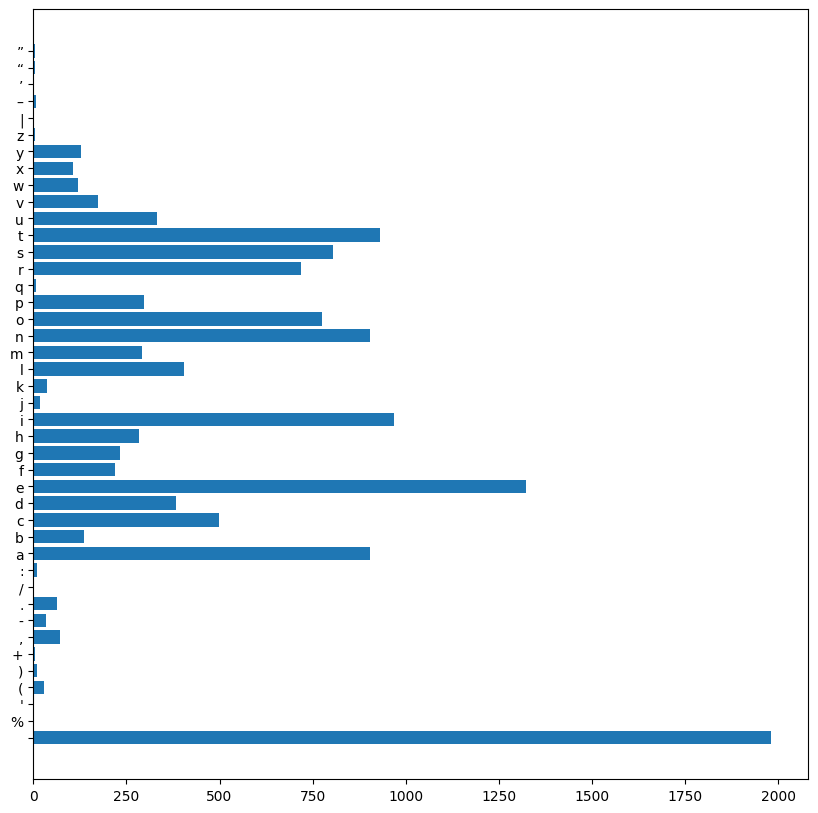

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

chosen_character = list(''.join(tax_reform_lines))
character_frequency = np.unique(chosen_character, return_counts=True)

plt.figure(figsize=(10, 10))
plt.barh(character_frequency[0], character_frequency[1])

### Word level Histogram

<BarContainer object of 20 artists>

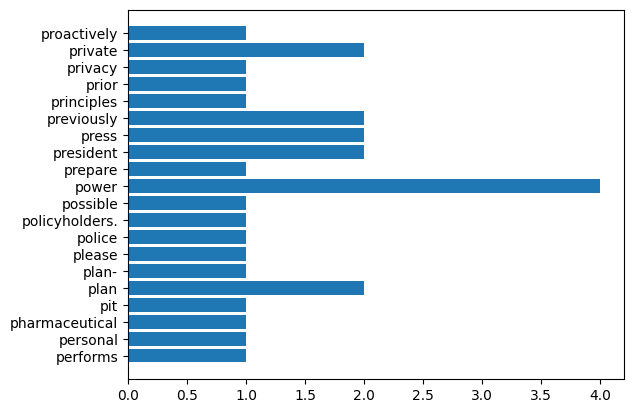

In [15]:
tax_reform_word_level = ' '.join(tax_reform_lines)
word_frequency = np.unique(tax_reform_word_level.split(), return_counts=True)

plt.barh(word_frequency[0][500:520], word_frequency[1][500:520])

### Word Cloud

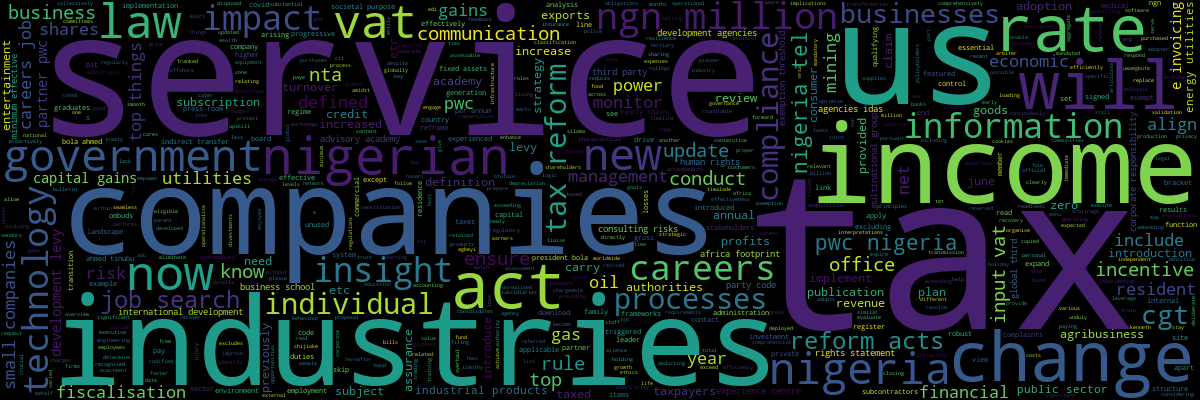

In [16]:
from wordcloud import WordCloud

tax_reform_wc = WordCloud(width=1200, height=400, max_words=3000, random_state=42).generate(tax_reform_word_level)
tax_reform_wc.to_image()

### Vectorization

##### One-Hot Encoding

In [17]:
from sklearn.preprocessing import OneHotEncoder

vocab = sorted(set(token for sentence in tax_reform_wtk_lines for token in sentence))
encoder = OneHotEncoder(categories=[vocab], sparse_output=False)

one_hot_encode_tax_reform = []

for sentence in tqdm(tax_reform_wtk_lines):
    encoded_sentence = encoder.fit_transform([[token] for token in sentence])
    one_hot_encode_tax_reform.append(encoded_sentence)

  0%|          | 0/223 [00:00<?, ?it/s]

In [18]:
sample_idx = 0
print(len(tax_reform_wtk_lines[sample_idx]), len(vocab))
one_hot_encode_tax_reform[sample_idx].shape

5 690


(5, 690)

##### Term Frequency

In [19]:
def compute_tf(document, word):
    return document.count(word) / len(document)

In [20]:
tax_reform_wtk_lines[10]

['consumer', 'and', 'industrial', 'products', 'and', 'services']

In [21]:
compute_tf(tax_reform_wtk_lines[10], 'and')

0.3333333333333333

In [22]:
compute_tf(tax_reform_wtk_lines[55], 'tax')

0.0

##### Inverse Document Frequency

In [23]:
def compute_idf(word, tax_reform_lines):
    doc_containing_words = sum(1 for sentence in tax_reform_lines if word in sentence)
    return np.log(len(tax_reform_lines) / (1 + doc_containing_words))

In [24]:
compute_idf("state", tax_reform_lines)

4.020877410340228

In [25]:
compute_idf("procedure", tax_reform_lines)

5.407171771460119

##### Combining TF and IDF

In [26]:
def compute_tf_idf(document, word, tax_reform_wtk_lines):
    tf = compute_tf(document, word)
    idf = compute_idf(word, tax_reform_char_tk)
    return tf * idf

In [27]:
def sentence_tf_idf(sentence_wt, vocab):

    vector = []

    for word in sentence_wt:
        vector.append(compute_tf_idf(sentence_wt, word, tax_reform_wtk_lines))
    return vector

In [28]:
idx = 150

sentence_wt = tax_reform_wtk_lines[idx]
print(f"Sentence:", ' '.join(sentence_wt))

vector = sentence_tf_idf(sentence_wt, vocab)
for i, score in enumerate(vector):
    print(f"{sentence_wt[i]}: {score:.4}")

Sentence: update compliance processes- taxpayers will need to update their compliance processes in line with the tax laws . for example , taxpayers will need to update their systems to cater for new rates , revised compliance obligations and filing requirements , information sharing , claim of input vat etc .
update: 0.3244
compliance: 0.3244
processes-: 0.1081
taxpayers: 0.2163
will: 0.2163
need: 0.2163
to: 0.3244
update: 0.3244
their: 0.2163
compliance: 0.3244
processes: 0.1081
in: 0.1081
line: 0.1081
with: 0.1081
the: 0.1081
tax: 0.1081
laws: 0.1081
.: 0.08024
for: 0.2163
example: 0.1081
,: 0.1481
taxpayers: 0.2163
will: 0.2163
need: 0.2163
to: 0.3244
update: 0.3244
their: 0.2163
systems: 0.1081
to: 0.3244
cater: 0.1081
for: 0.2163
new: 0.1081
rates: 0.1081
,: 0.1481
revised: 0.1081
compliance: 0.3244
obligations: 0.1081
and: 0.1081
filing: 0.1081
requirements: 0.1081
,: 0.1481
information: 0.1081
sharing: 0.1081
,: 0.1481
claim: 0.1081
of: 0.1081
input: 0.1081
vat: 0.1081
etc: 0.10

In [29]:
from gensim import corpora
from gensim.models import TfidfModel

dictionary = corpora.Dictionary(tax_reform_wtk_lines)
bow_corpus = [dictionary.doc2bow(sentence) for sentence in tax_reform_wtk_lines]

tfidf_model = TfidfModel(bow_corpus)
tfidf_vector = [tfidf_model[bow] for bow in bow_corpus]

In [30]:
idx = 10
sentence = tax_reform_wtk_lines[idx]
print("Sentence: ", sentence)

for word_id, score in tfidf_vector[idx]:
    print(f"{dictionary[word_id]}: {score:.4f}")

Sentence:  ['consumer', 'and', 'industrial', 'products', 'and', 'services']
services: 0.2585
and: 0.3662
consumer: 0.5276
industrial: 0.5276
products: 0.4924


#### Comparing two sentences

In [31]:
sen1 = 17
sen2 = 11

print(f"Sentence_1: {' '.join(tax_reform_wtk_lines[sen1])}")
print(f"Sentence_2: {' '.join(tax_reform_wtk_lines[sen2])}")

similarity = gs.matutils.cossim(
    vec1 = tfidf_vector[sen1],
    vec2 = tfidf_vector[sen2],
)

print(similarity)

Sentence_1: power and utilities
Sentence_2: energy utilities and mining
0.36863062836597843


### Word Embeddings

##### Gensim

In [32]:
import gensim.downloader as api

glove = api.load("glove-wiki-gigaword-100")

In [33]:
def get_gensim_embeddings(tax_reform_wtk_lines):
    embeddings = []

    for word in tax_reform_wtk_lines:
        if word in glove:
            embeddings.append(glove[word])
        return embeddings

In [34]:
gensim_embeddings = get_gensim_embeddings(tax_reform_wtk_lines[0])
print(np.shape(gensim_embeddings))

(1, 100)


##### Word Similarity

In [35]:
def gensim_word_similarity(word1, word2):
    if word1 in glove and word2 in glove:
        return glove.similarity(word1, word2)
    return 0

In [36]:
gensim_word_similarity("courage", "confidence")

0.5064108

In [37]:
gensim_word_similarity("waive", "waiver")

0.6629828

#### Visualizing Word Embeddings

In [38]:
selected_words = ["play", "joke", "assessment", "tax", "proceedings", "students", "class", "acceptance", "deprived", "govern", "workers"]
word_embeddings = np.array([glove[word] for word in selected_words if word in glove])
word_embeddings.shape

(11, 100)

In [39]:
from sklearn.manifold import TSNE

def visualize_word_embeddings(word_embeddings, selected_words, glove):

    tsne = TSNE(n_components=2, random_state=42, learning_rate='auto', perplexity=3)
    word_2D_embeddings = tsne.fit_transform(word_embeddings)

    plt.figure(figsize=(5, 5))
    for i, word in enumerate(selected_words):
        if word in glove:
            plt.scatter(word_2D_embeddings[i, 0], word_2D_embeddings[i, 1], marker="+", color="blue")
            plt.text(word_2D_embeddings[i, 0]+0.2, word_2D_embeddings[i, 1], word, fontsize =10)
    plt.show()

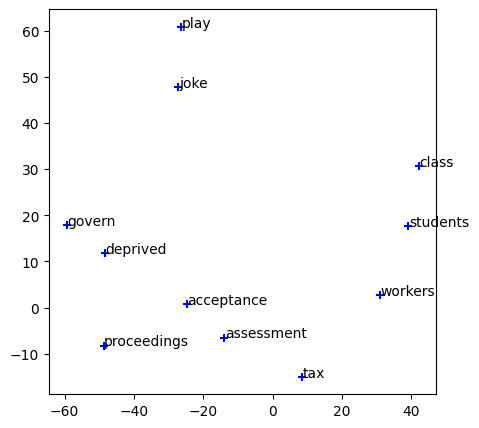

In [40]:
visualize_word_embeddings(word_embeddings, selected_words, glove)

##### Training Your Word Embedding Model

In [41]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=tax_reform_wtk_lines, vector_size=100, window=5, min_count=1, workers=4)
model.save('tax_word2vec_model.bin')

In [42]:
model = Word2Vec.load('tax_word2vec_model.bin')

In [43]:
model.wv.similarity('law', 'conduct')

0.02788324

##### Visualize Embedding

In [44]:
selected_vwords = ['objection', 'approve', 'yoruba', 'nigeria', 'language', 'word', 'writing', 'customer', 
                   'customs', 'constitution', 'law', 'consumer', 'and', 'industrial', 'products', 'and', 
                   'services', 'privacy', 'about', 'site', 'provider', 'site map', 'cookies', 'information', 
                    'societal', 'purpose', 'subscription', 'tax', 'academy','about', 'us','africa', 
                    'footprint','advisory', 'academy']

vword_embedding = np.array([model.wv[word] for word in selected_vwords if word in model.wv])
vword_embedding.shape
 

(25, 100)

IndexError: index 25 is out of bounds for axis 0 with size 25

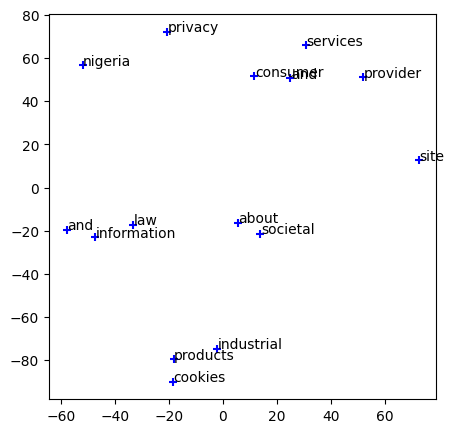

In [45]:
visualize_word_embeddings(vword_embedding, selected_vwords, model.wv)

#### Sentence Embedding

In [46]:
sentence1 = word_tokenize(" Net Income is defined as profits before tax excluding franked investment income and unrealised gains or losses".lower())
sentence2 = word_tokenize("If a company has unused tax credits or qualifying capital expenses".lower())
glove.n_similarity(sentence1, sentence2)

0.9096227

In [52]:
sentence1 = word_tokenize("The NTA introduces CGT on indirect transfers of shares in Nigerian companies so that where shares".lower())
sentence2 = word_tokenize("Income is defined as profits before tax excluding franked investment income and unrealised gains or losses".lower())
glove.n_similarity(sentence1, sentence2)

0.8659938

#### SpaCy